Jupyter Notebook

In [29]:
pid = '625930cc64a5fc0018309217'
uid='6239c25c5c84bb00c656c07c'
output_data_group='625930cc64a5fc0018309218'

## Imports

In [30]:
import pandas as pd
from predictsense import PredictSense
from matplotlib import pyplot as plt
from pandas_visual_analysis import VisualAnalysis
%matplotlib inline

## Load data

In [31]:
ps = PredictSense(pid=pid, uid=uid)

Make sure you are running the notebook in PredictSense.


In [32]:
ps.list_uploaded_datasets(file_filter='pkl', file_source='all')[['dataGroupName', 'filename', 'fileSource']]

'DataFrame' object has no attribute 'dataGroupName'
Could not list available data.


KeyError: "None of [Index(['dataGroupName', 'filename', 'fileSource'], dtype='object')] are in the [columns]"

In [53]:
#Please pass one of the available file names to load_pandas_dataframe.
df = ps.load_pandas_dataframe('upload-IRIS-1650012376763.pkl')
df.head()

sepal_length  sepal_width  petal_length  petal_width     species
0           5.1          3.5           1.4          0.2  Irissetosa
1           4.9          3.0           1.4          0.2  Irissetosa
2           4.7          3.2           1.3          0.2  Irissetosa
3           4.6          3.1           1.5          0.2  Irissetosa
4           5.0          3.6           1.4          0.2  Irissetosa

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float32
 1   sepal_width   150 non-null    float32
 2   petal_length  150 non-null    float32
 3   petal_width   150 non-null    float32
 4   species       150 non-null    object 
dtypes: float32(4), object(1)
memory usage: 3.6+ KB


In [55]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [56]:
# one_hot = pd.get_dummies(df['species'])
# df = df.join(one_hot)

In [57]:
#df.drop('species',inplace=True,axis=1)

In [58]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

In [59]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

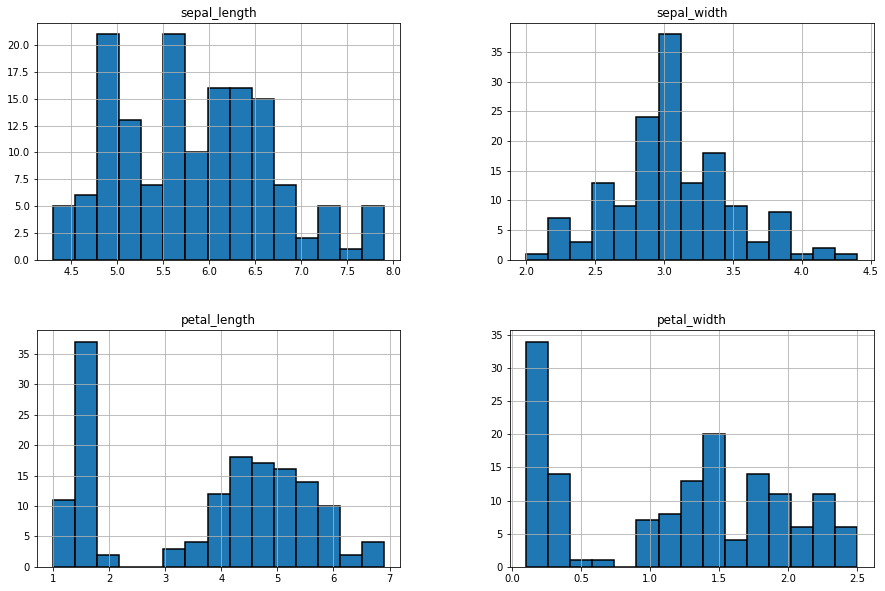

In [60]:
df.hist(bins=15, edgecolor='black', linewidth=1.5, figsize=(15,10))
plt.show()

In [61]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [62]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="sepal_length", x="species", data=df)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="sepal_width", x="species", data=df)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="petal_length", x="species", data=df)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="petal_width", x="species", data=df)
plt.tight_layout()
plt.show()

<h2>Data Analysis</h2><br><i><b>Note</b>: The data must have categorical or boolean features for the visual analysis to work.</i>

In [6]:
if df.select_dtypes(['object', 'bool']).shape[1] > 0:
    analysis = VisualAnalysis(df, seed=7)
else:
    analysis = df.describe(include='all')
analysis

## Create and save shareable outputs

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
df.hist(ax=ax)
plt.tight_layout();
report_id = ps.save_report(fig, name='histogram', description='Distributions of numerical features', save_as='pdf')

## Check if you have any features shared with you

In [8]:
shared_feature_list = ps.list_shared_features()
if len(shared_feature_list) > 0:
    print ('Top 5 shared features')
    print (shared_feature_list.head())

## Load one of the shared features

In [9]:
if len(shared_feature_list) > 0:
    shared_features = shared_feature_list[shared_feature_list['type'] == 'feature']
    if len(shared_features) > 0:
        shared_feature = ps.get_shared_feature(shared_features.loc[0, 'name'])
        print (shared_features.head())

## Please run the below cell to use this modified data-frame for training

In [10]:
# Specify the file name to save this current file to 
ps.save_data(df, file_name='Iris_Dat.csv', data_group=output_data_group)